In [11]:
import seaborn as sns
import json
import matplotlib.pyplot as plt
import numpy as np

In [78]:
accept_rates = []
sample_sizes = []
grads = []
samples = []
stage_1_collected_data = []

path_prefix = '/scratch/jiarui14/EM-CoT/EM-CoT/data/Qwen2-1.5B-Inst/stage1n8_embed_tokens_grad_sum/data_1'

for i in range(10):
    with open(f'{path_prefix}/accept_rates_{i}.json', 'r') as f:
        accept_rates.extend(json.load(f))
    with open(f'{path_prefix}/sample_sizes_{i}.json', 'r') as f:
        sample_sizes.extend(json.load(f))
    with open(f'{path_prefix}/grads_{i}.json', 'r') as f:
        grads.extend(json.load(f))
    # with open(f'{path_prefix}/stage_2_collected_data_{i}.json', 'r') as f:
    #     samples.extend(json.load(f))
    with open(f'{path_prefix}/stage_1_collected_data_{i}.json', 'r') as f:
        stage_1_collected_data.extend(json.load(f))

# samples_num = [len(s['outputs']) for s in samples]
stage_1_samples_num = [len(s['outputs']) for s in stage_1_collected_data]

Text(0, 0.5, 'Gradient')

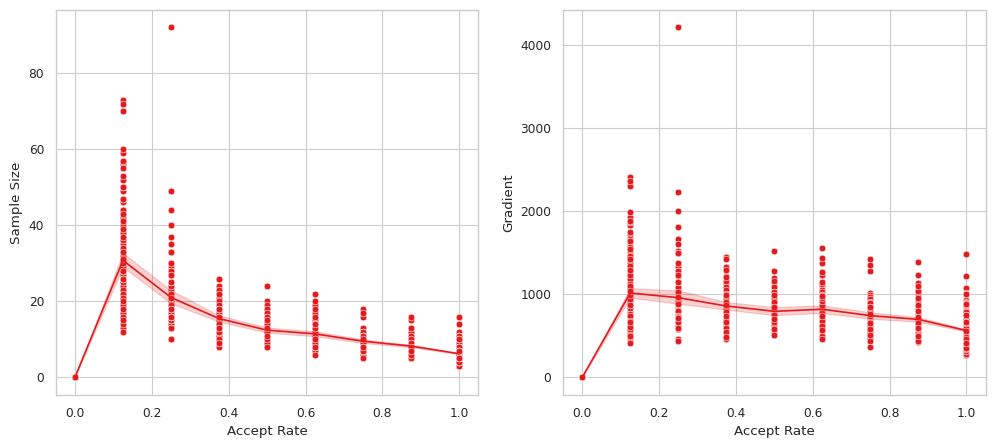

In [79]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# draw the plot that shows how sample size changes with accept rate
sns.scatterplot(x=accept_rates, y=sample_sizes)
sns.lineplot(x=accept_rates, y=sample_sizes)
# add labels for x and y axis
plt.xlabel('Accept Rate')
plt.ylabel('Sample Size')

plt.subplot(1, 2, 2)
# draw the plot that shows how gradient changes with accept rate
sns.scatterplot(x=accept_rates, y=grads)
sns.lineplot(x=accept_rates, y=grads)
# add labels for x and y axis
plt.xlabel('Accept Rate')
plt.ylabel('Gradient')

# plt.subplot(1, 3, 3)
# # draw the plot that shows how sample number changes with accept rate
# sns.scatterplot(x=accept_rates, y=samples_num)
# sns.lineplot(x=accept_rates, y=samples_num)
# # add labels for x and y axis
# plt.xlabel('Accept Rate')
# plt.ylabel('Sample Number')


In [65]:
# draw a figure that shows the distribution of f(x)
alphas = np.linspace(1e-8, 1e-7, 15)
betas = np.linspace(2, 5, 5)

x_plots = len(alphas)
y_plots = len(betas)
num_plots = x_plots * y_plots
plt.figure(figsize=(80, 120))

for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        plt.subplot(x_plots, y_plots, i * y_plots + j + 1)
        x = np.linspace(0, 1, 100)
        y = 1 / np.sqrt(x + alpha * np.power(x, 1-beta))
        plt.plot(x, y)
        plt.xlabel('x')
        plt.ylabel('f(x)')
        # 使用科学计数法表示
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        plt.title(f'alpha={alpha}, beta={beta}')

# plt.figure(figsize=(10, 6))
# x = np.linspace(-10, 10, 100)
# y = x + alpha * np.power(x, beta-1)
# plt.plot(x, y)
# plt.xlabel('x')
# plt.ylabel('f(x)')
# plt.title('f(x) = x^2')

/tmp/ipykernel_476569/3790290993.py:14: RuntimeWarning: divide by zero encountered in power
  y = 1 / np.sqrt(x + alpha * np.power(x, 1-beta))


Text(0, 0.5, 'Count')

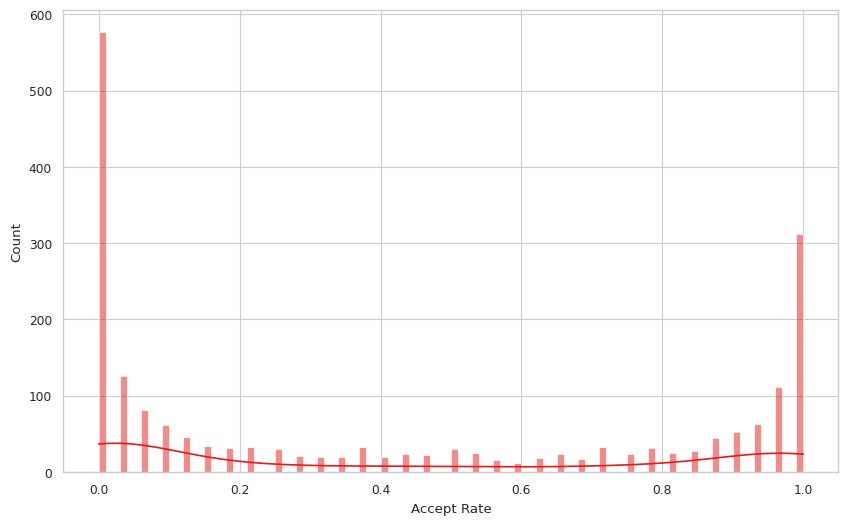

In [44]:
# draw the plot of accept rate
plt.figure(figsize=(10, 6))
sns.histplot(accept_rates, bins=100, kde=True)
plt.xlabel('Accept Rate')
plt.ylabel('Count')

In [16]:
betas

array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])